1.Import and Load Data:



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score


2.Load the Training Data:

In [15]:
# Load the training data
train_file_path = "/content/train.xlsx"  # Update with the correct path
dataset = pd.read_excel(train_file_path)

# Split into features and target
X = dataset.drop(columns=['target'])
y = dataset['target']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([110, 137,  10, ...,  55,  91, 119])

3.Split Data into Training and Test Sets:

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


4.Standardize the Features:

In [4]:
# Initialize the standard scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data
X_test = scaler.transform(X_test)


5.Define and Train Models:

In [5]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machines': LinearSVC(),
    'Decision Trees': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbor': KNeighborsClassifier()
}

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    # Train the model
    models[key].fit(X_train, y_train)

    # Make predictions
    predictions = models[key].predict(X_test)

    # Calculate performance metrics
    accuracy[key] = accuracy_score(y_test, predictions)
    precision[key] = precision_score(y_test, predictions, average='macro')
    recall[key] = recall_score(y_test, predictions, average='macro')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


6.Compile Results into a DataFrame:

In [7]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

# Display the DataFrame
print(df_model)


                         Accuracy  Precision    Recall
Logistic Regression      0.972138   0.976949  0.976677
Support Vector Machines  0.963104   0.968473  0.970526
Decision Trees           0.966260   0.968887  0.968167
Random Forest            0.986831   0.988278  0.988235
Naive Bayes              0.958968   0.972232  0.965611
K-Nearest Neighbor       0.983457   0.985162  0.986066


7.Visualize the Results:

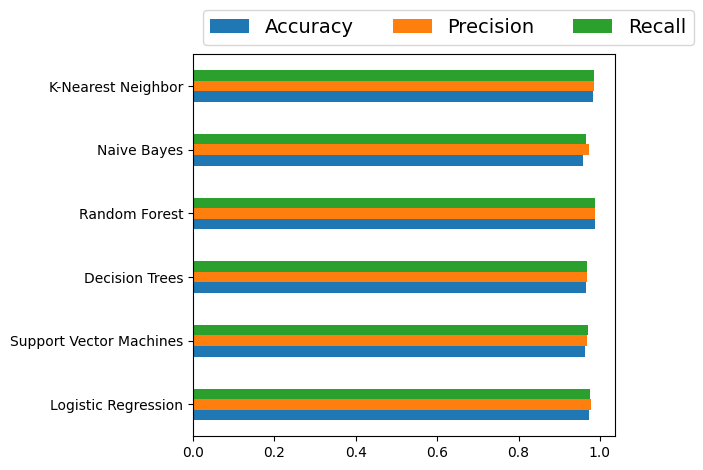

In [8]:
ax = df_model.plot.barh()
ax.legend(ncol=len(models.keys()), bbox_to_anchor=(0,1), loc='lower left', prop={'size': 14})
plt.tight_layout()
plt.show()


8.Save Predictions for Evaluation:

In [9]:
# Save the test predictions for each model
test_predictions = {}
for key in models.keys():
    test_predictions[key] = models[key].predict(X_test)

# Convert predictions to DataFrame and save to Excel
predictions_df = pd.DataFrame(test_predictions)
predictions_df['True Labels'] = y_test
predictions_df.to_excel("test_predictions.xlsx", index=False)


In [17]:
# 1. Load the test data
test_file_path = "/content/test.xlsx"  # Update with the correct path
test_dataset = pd.read_excel(test_file_path)

# 2. Preprocess the test data (similar to how you preprocessed the training data)
# For example, encode categorical variables and standardize features
test_X = test_dataset  # Assuming 'target' column is not present in the test data

# Encode categorical variables (if any)
# Apply any other preprocessing steps (e.g., handling missing values) as done for the training data

# Standardize features using the same scaler used for training data
#est_X = ss_train.transform(test_X)  # Assuming 'ss_train' is the StandardScaler object used for training data

# 3. Use the trained models to make predictions on the test data
test_predictions = {}
for key, model in models.items():
    test_predictions[key] = model.predict(test_X)

# 4. Optionally, save the predictions for evaluation
# Convert predictions to DataFrame and save to Excel
test_predictions_df = pd.DataFrame(test_predictions)
test_predictions_df.to_excel("test_predictions.xlsx", index=False)

# Alternatively, if you want to append predictions to the test dataset and save it
test_dataset['predicted_target'] = test_predictions['Logistic Regression']
test_dataset.to_excel("test_with_predictions.xlsx", index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(

I have uses the Logistic Regression because among all the alogithms it works quite good on test dataset